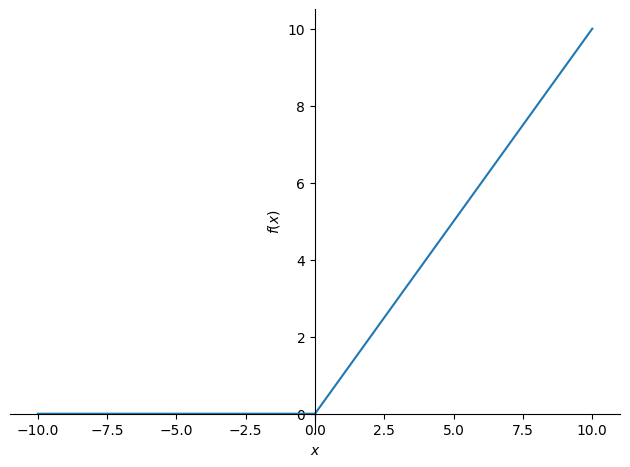

In [ ]:
#kreślenie funkcji ReLU
from sympy import *

x = symbols('x')
relu = Max(0, x)
plot(relu)

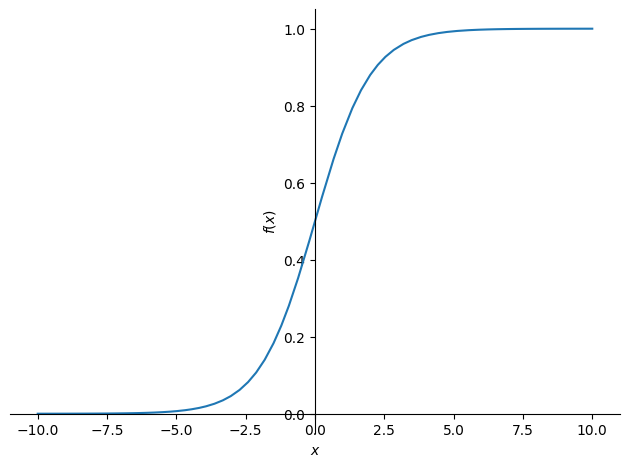

In [ ]:
#Logistyczna funkcja aktywacji
from sympy import *

x = symbols('x')
logistyczna = 1 / (1 + exp(-x))
plot(logistyczna)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wszystkie_dane = pd.read_csv('https://tinyurl.com/y2qmhfsr')

wszystkie_wejscia = (wszystkie_dane.iloc[:, 0:3].values / 255.0)
wszystkie_wyjscia = wszystkie_dane.iloc[:, -1].values

X_trening, X_test, Y_trening, Y_test = train_test_split(wszystkie_wejscia, wszystkie_wyjscia, test_size=1/3)
n = X_trening.shape[0]

#losowe współczynniki kierunkowe
w_ukryta = np.random.rand(3, 3)
w_wyjsciowa = np.random.rand(1, 3)

#losowe wyrazy wolne
b_ukryta = np.random.rand(3, 1)
b_wyjsciowa = np.random.rand(1, 1)

#funkcje aktywacyjne
relu = lambda x: np.maximum(x, 0)
logistyczna = lambda x: 1 / (1 + np.exp(-x))

#propagacja w przód
def prop_w_przod(X):
  Z1 = w_ukryta @ X + b_ukryta
  A1 = relu(Z1)
  Z2 = w_wyjsciowa @ A1 + b_wyjsciowa
  A2 = logistyczna(Z2)
  return Z1, A1, Z2, A2

#obliczanie dokładności
test_prognoza = prop_w_przod(X_test.transpose())[3]
test_porownanie = np.equal((test_prognoza >= .5).flatten().astype(int), Y_test)
dokladnosc = sum(test_porownanie.astype(int) / X_test.shape[0])
print(f'DOKŁADNOŚĆ: {dokladnosc}')

DOKŁADNOŚĆ: 0.6258351893095758


In [ ]:
#Obliczanie pochodnej funkcji kosztu względem A2
from sympy import *

A2, Y = symbols('A2, Y')
C = (A2 - Y)**2
dC_dA2 = diff(C, A2)
print(dC_dA2)

2*A2 - 2*Y


In [1]:
#Obliczanie pochodnej funkcji kosztu względem A2
from sympy import *

A2, Y = symbols('A2 Y')
C = (A2 - Y)**2
dC_dA2 = diff(C, A2)
print(dC_dA2)

2*A2 - 2*Y


In [4]:
#Obliczanie pochodnej A2 względem Z2
from sympy import *

Z2 = symbols('Z2')

logistyczna = lambda x: 1 / (1 + exp(-x))
A2 = logistyczna(Z2)
dA2_DZ2 = diff(A2, Z2)
print(dA2_DZ2)

exp(-Z2)/(1 + exp(-Z2))**2


In [8]:
#Obliczanie pochodnej Z2 względem W2
from sympy import *

A1, W2, B2 = symbols('A1, W2, B2')

Z2 = A1*W2 + B2
dZ2_dW2 = diff(Z2, W2)
print(dZ2_dW2)

A1


In [16]:
#Obliczanie wszystkich pochodnych cząstkowych potrzebnych w sieci neuronowej
from sympy import *

W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

c = (A2 - Y)**2
dC_dA2 = diff(C, A2)
print('dC_dA2 = ', dC_dA2)

logistyczna = lambda x: 1 / (1 + exp(-x))
_A2 = logistyczna(Z2)
dA2_dZ2 = diff(_A2, Z2)
print('dA2_dZ2 = ', dA2_dZ2)

_Z2 = A1*W2 + B2
dZ2_dA1 = diff(_Z2, A1)
print('dZ2_dA1 = ', dZ2_dA1)

dZ2_dW2 = diff(_Z2, W2)
print('dZ2_dW2 =', dZ2_dW2)

dZ2_dB2 = diff(_Z2, B2)
print('dZ2_dB2 = ', dZ2_dB2)

relu = lambda x: Max(x, 0)
_A1 = relu(Z1)
d_relu = lambda x: x > 0
dA1_dZ1 = d_relu(Z1)
print('dA1_dZ1 = ', dA1_dZ1)

_Z1 = X*W1 + B1
dZ1_dW1 = diff(_Z1, W1)
print('dZ1_dW1', dZ1_dW1)

dZ1_dB1 = diff(_Z1, B1)
print('dZ1_dB1 = ', dZ1_dB1)

dC_dA2 =  2*A2 - 2*Y
dA2_dZ2 =  exp(-Z2)/(1 + exp(-Z2))**2
dZ2_dA1 =  W2
dZ2_dW2 = A1
dZ2_dB2 =  1
dA1_dZ1 =  Z1 > 0
dZ1_dW1 X
dZ1_dB1 =  1


In [20]:
#Implementacja sieci neuronowej ze stochastycznym zejściem po gradiencie
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wszystkie_dane = pd.read_csv('https://tinyurl.com/y2qmhfsr')

L = 0.005

wszystkie_wejscia = (wszystkie_dane.iloc[:, 0:3].values / 255.0)
wszystkie_wyjscia = wszystkie_dane.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(wszystkie_wejscia, wszystkie_wyjscia, test_size=1/3)

n = X_train.shape[0]

w_ukryta = np.random.rand(3, 3)
w_wyjsciowa = np.random.rand(1, 3)

b_ukryta = np.random.rand(3, 1)
b_wyjsciowa = np.random.rand(1, 1)

relu = lambda x: np.maximum(x, 0)
logistyczna = lambda x: 1 / (1 + np.exp(-x))

def prop_w_przod(X):
  Z1 = w_ukryta @ X + b_ukryta
  A1 = relu(Z1)
  Z2 = w_wyjsciowa @ A1 + b_wyjsciowa
  A2 = logistyczna(Z2)
  return Z1, A1, Z2, A2

d_relu = lambda x: x > 0
d_logistyczna = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

def prop_wsteczna(Z1, A1, Z2, A2, X, Y):
  dC_dA2 = 2 * A2 - 2 * Y
  dA2_dZ2 = d_logistyczna(Z2)
  dZ2_dA1 = w_wyjsciowa
  dZ2_dW2 = A1
  dZ2_dB2 = 1
  dA1_dZ1 = d_relu(Z1)
  dZ1_dW1 = X
  dZ1_dB1 = 1

  dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T
  dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2
  dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1
  dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T
  dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

  return dC_dW1, dC_dB1, dC_dW2, dC_dB2

for i in range(100_000):
  idx = np.random.choice(n, 1, replace=False)
  X_proba = X_train[idx].transpose()
  Y_proba = Y_train[idx]

  Z1, A1, Z2, A2 = prop_w_przod(X_proba)

  dW1, dB1, dW2, dB2 = prop_wsteczna(Z1, A1, Z2, A2, X_proba, Y_proba)

  w_ukryta -= L*dW1
  b_ukryta -= L*dB1
  w_wyjsciowa -= L*dW2
  b_wyjsciowa -=L*dB2

  print(w_ukryta)



test_prognoza = prop_w_przod(X_test.transpose())[3]
test_porownanie = np.equal((test_prognoza >= .5).flatten().astype(int), Y_test)
dokladnosc = sum(test_porownanie.astype(int) / X_test.shape[0])
print(f'DOKŁADNOŚĆ: {dokladnosc}')

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
 [1.82117488 3.68149658 0.75793305]]
[[1.22177501 3.53134411 0.05398601]
 [2.03726117 3.52893454 0.83240079]
 [1.82117488 3.68148797 0.75792411]]
[[1.22177502 3.53134412 0.05398602]
 [2.03726118 3.52893454 0.8324008 ]
 [1.82117489 3.68148797 0.75792412]]
[[1.22177502 3.53134412 0.05398602]
 [2.03726118 3.52893454 0.8324008 ]
 [1.82117489 3.68148797 0.75792412]]
[[1.22177502 3.53134412 0.05398602]
 [2.03726118 3.52893454 0.8324008 ]
 [1.82117489 3.68148797 0.75792412]]
[[1.22174269 3.53133914 0.05396364]
 [2.03722884 3.52892957 0.83237842]
 [1.82114256 3.681483   0.75790174]]
[[1.22174269 3.53133914 0.05396364]
 [2.03722884 3.52892957 0.83237842]
 [1.82114256 3.681483   0.75790174]]
[[1.22174269 3.53133914 0.05396364]
 [2.03722884 3.52892957 0.83237842]
 [1.82114256 3.681483   0.75790174]]
[[1.22109161 3.53108824 0.0537826 ]
 [2.03657776 3.52867866 0.83219739]
 [1.82049147 3.68123209 0.7577207 ]]
[[1.21959002 3.52958665 0.